In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# path to train dataset
data_path = '/Users/Adit/Desktop/Learnbay/Data-Science/Python/datasets/train.csv'

# Read a comma-separated values (csv) file into pandas DataFrame
all_data = pd.read_csv(data_path)

# shape of tha data
print('Data shape: ', all_data.shape)

Data shape:  (891, 12)


In [3]:
all_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


# 5. First look: variables, NAs

> Indented block


## 5.1 Variables
From the data overview of the competition, we have a description of each variable:
* PassengerId - unique identifier
* Survived:
        0 = No
        1 = Yes
* Pclass: Ticket class
        1 = 1st, Upper
        2 = 2nd, Middle
        3 = 3rd, Lower
* Name: full name with a title
* Sex: gender
* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* Sibsp: Number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:
        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: Number of parents / children aboard the Titanic. The dataset defines family relations in this way:
        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number.
* Fare: Passenger fare.
* Cabin: Cabin number.
* Embarked: Port of Embarkation:
        C = Cherbourg
        Q = Queenstown
        S = Southampton

## 5.2 Types of the variables

Data types, non-null values count:

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




Age and Fare are continuous numeric variables.  
Pclass is integer, but in fact it is categorical variable, represented by 3 numbers.  


## 5.3 Check data for NA
To check the dataset for NAs I am using **isna()** dataframe function, which returns a boolean same-sized object indicating if the values are NA and then I am calculating the number of True values for each variable.   
NA values for each dataframe (train, test, all) presented in the table below:

In [5]:
# check data for NA values
all_data_NA = all_data.isna().sum()
#train_NA = train_data.isna().sum()
#test_NA = test_data.isna().sum()

#pd.concat([train_NA, test_NA, all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])

In [6]:
all_data_NA

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 6. Exploring the data

## 6.1 Survivals - target value
Let's calculate and visualise distribution of our target variable - 'Survived'.  
A countplot of seaborn module is a very useful way to show the counts of observations in each category.  
Since we have target only for the training part, these numbers don't include all passengers.

Text(0, 0.5, 'Number of passengers')

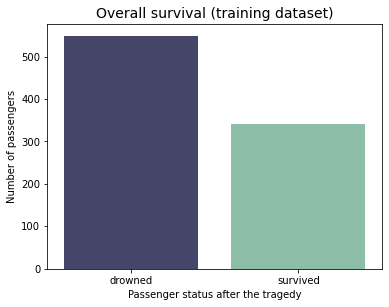

In [9]:
# set size of the plot
plt.figure(figsize=(6, 4.5)) 

# countplot shows the counts of observations in each categorical bin using bars.
# x - name of the categorical variable
ax = sns.countplot(x = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"])

# set the current tick locations and labels of the x-axis.
plt.xticks(np.array([0,1]), ['drowned', 'survived'] )
# set title
plt.title('Overall survival (training dataset)',fontsize= 14)
# set x label
plt.xlabel('Passenger status after the tragedy')
# set y label
plt.ylabel('Number of passengers')

# calculate passengers for each category
#labels = (all_data['Survived'].value_counts())

#print(labels)

In [10]:
all_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

We have 891 passengers in train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived.  
But we know, that lifeboats could carry 53% of total passengers.

## 6.2 AGE
What is the age of passengers, how it relates to the chances of survival, and how it changes depending on class and gender.
### 6.2.1 Age distribution
We have 263 missing values:  
* 177 missing in the training dataset 
* 86 in the test dataset

Overall age distribution (seaborn distplot) and descriptive statistics:

/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


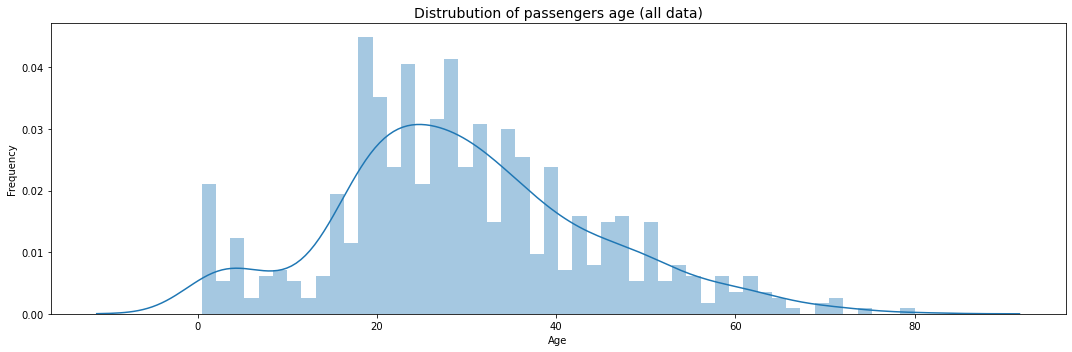

In [12]:
# set plot size
plt.figure(figsize=(15, 5))

# plot a univariate distribution of Age observations 
sns.distplot(all_data['Age'],bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

In [13]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
age_distr = pd.DataFrame(all_data['Age'].describe())
# Transpose index and columns.
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [14]:
all_data.loc[all_data['Age']>60,'Survived'].value_counts(normalize=True)

0    0.772727
1    0.227273
Name: Survived, dtype: float64

The distribution of Age is slightly right skewed. The Age vary from about **0.17** year to **80** years with mean = 29.88, and there don't seem to be any obvious outliers, but we will check it.

### 6.2.2 Age by surviving status
Did age had a big influence on chances to survive?  
To visualize two age distributions, grouped by surviving status I am using boxlot and stripplot showed together:

Text(0, 0.5, 'Passenger Age')

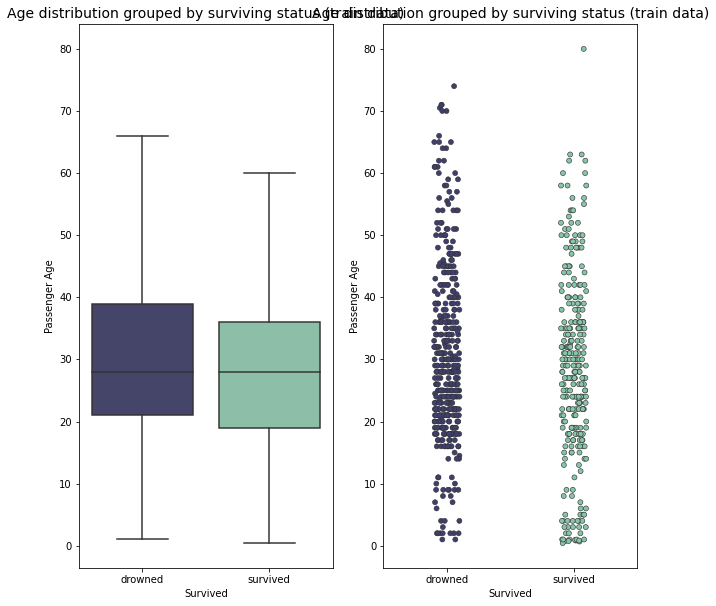

In [16]:
plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(x = 'Survived', y = 'Age', data = all_data,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0)

plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger Age')

plt.subplot(1,2,2)
# Add a scatterplot for each category.
sns.stripplot(x = 'Survived', y = 'Age', data = all_data,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"])

plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger Age')

In [17]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


The mean age of survived passenger is 28.34 which on 2.28 smaller than the mean age of drowned passengers (only passengers we know survived status for).   
The minimum age of drowned passengers is 1 y.o which is very sad. 
It looks like there is a slightly bigger chance to survive for younger people.

### 6.2.3 Age by class
There I will compare three age distributions, grouped by class of the passenger.  
As visualisations I will use 2 gaphs:
1. boxplot+stripplot as before
2. kdeplot, to plot age density curves for each class. This method can't handle missing values, so I filter the data before using it.

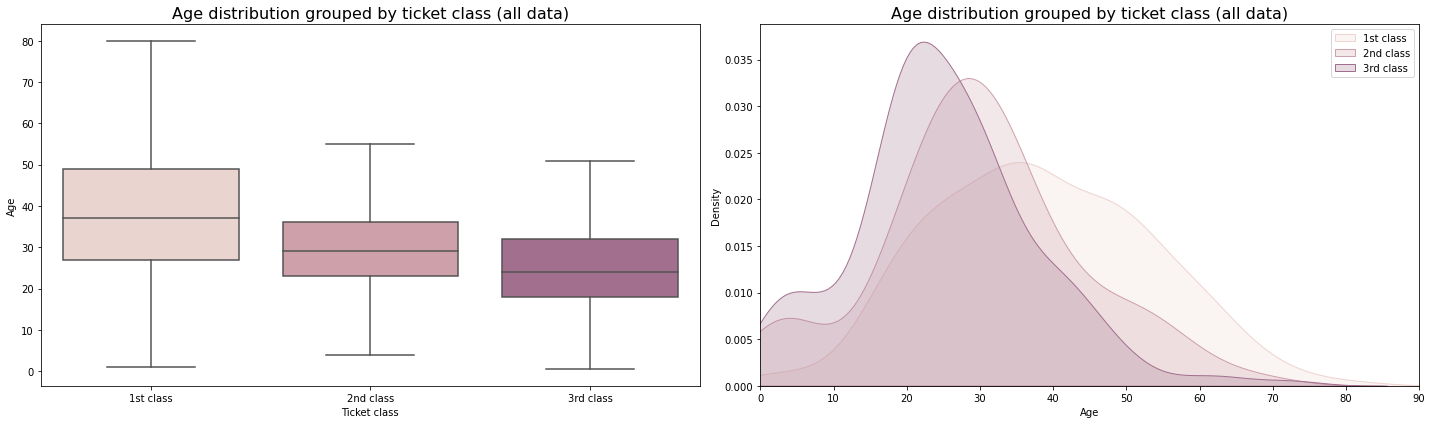

In [18]:
# set size
plt.figure(figsize=(20, 6)) ## Total Canvas Area

# set palette
palette = sns.cubehelix_palette(5, start = 3)

plt.subplot(1, 2, 1)

sns.boxplot(x = 'Pclass', y = 'Age', data = all_data,
     palette = palette, fliersize = 0)

#sns.stripplot(x = 'Pclass', y = 'Age', data = all_data,
     #linewidth = 0.6, palette = palette)

plt.xticks(np.array([0,1,2]), ['1st class', '2nd class', '3rd class'])
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Ticket class')


plt.subplot(1, 2, 2)

# To use kdeplot I need to create variables with filtered data for each category
age_1_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 1)]
age_2_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 2)]
age_3_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 3)]

# Ploting the 3 variables that we create
sns.kdeplot(age_1_class["Age"], shade=True, color='#eed4d0', label = '1st class')
sns.kdeplot(age_2_class["Age"], shade=True,  color='#cda0aa', label = '2nd class')
sns.kdeplot(age_3_class["Age"], shade=True,color='#a2708e', label = '3rd class')
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.legend()
plt.show()

In [19]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Pclass')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


1st class has wider distribution compare to 2nd and 3rd and almost symmetric.  
Both 2nd and 3rd classes age distributions are right skewed.  
The youngest passenger has 3rd class ticket, age = 0.42.  
The oldest passenger has 1st class ticket, age = 80.  
3rd class mean age = 25.14, 2nd classe average age is 29.87 and 1st class average age is 38.23.   
 
 
Since survived passengers on average younger than drowned, does it mean, that 3rd class passengers had more chances to survive? We will discover it later.  

From graphs we can see difference in age distribution between classes. So when I will do missing data imputation I will take class into account.  

### 6.2.4 Age vs class vs gender
Comparison of age distribution by gender I will do separately for each class since we have such a noticeable age difference between classes.

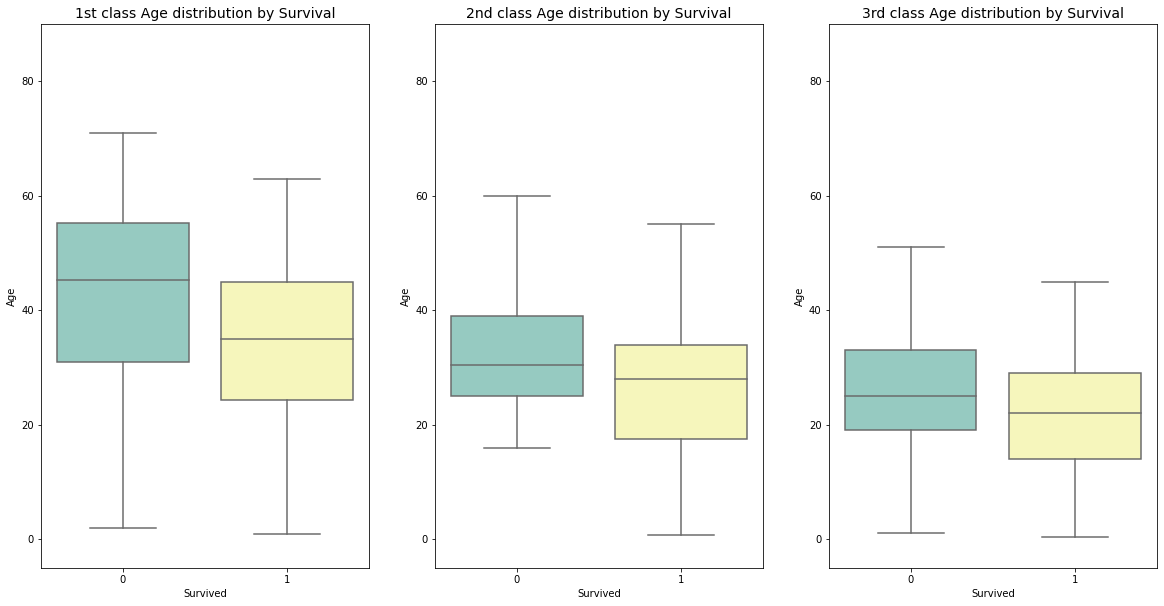

In [20]:
plt.figure(figsize=(20, 10))
palette = "Set3"

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Survived', y = 'Age', data = age_1_class,
     palette = palette, fliersize = 0)
#sns.stripplot(x = 'Sex', y = 'Age', data = age_1_class,
     #linewidth = 0.6, palette = palette)
plt.title('1st class Age distribution by Survival',fontsize= 14)
plt.ylim(-5, 90)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Survived', y = 'Age', data = age_2_class,
     palette = palette, fliersize = 0)
#sns.stripplot(x = 'Sex', y = 'Age', data = age_2_class,
     #linewidth = 0.6, palette = palette)
plt.title('2nd class Age distribution by Survival',fontsize= 14)
plt.ylim(-5, 90)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Survived', y = 'Age',  data = age_3_class, palette = palette, fliersize = 0)
#sns.stripplot(x = 'Sex', y = 'Age', data = age_3_class,
     #order = ['female', 'male'], linewidth = 0.6, palette = palette)
plt.title('3rd class Age distribution by Survival',fontsize= 14)
plt.ylim(-5, 90)

plt.show()

In [ ]:
# Descriptive statistics:
age_1_class_stat = pd.DataFrame(age_1_class.groupby('Survived')['Age'].describe())
age_2_class_stat = pd.DataFrame(age_2_class.groupby('Survived')['Age'].describe())
age_3_class_stat = pd.DataFrame(age_3_class.groupby('Survived')['Age'].describe())

pd.concat([age_1_class_stat, age_2_class_stat, age_3_class_stat], axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

count       mean        std    min    25%    50%    75%   max
    Survived                                                               
1st 0          64.0  43.695312  15.284243   2.00  31.00  45.25  55.25  71.0
    1         122.0  35.368197  13.760017   0.92  24.25  35.00  45.00  80.0
2nd 0          90.0  33.544444  12.151581  16.00  25.00  30.50  39.00  70.0
    1          83.0  25.901566  14.837787   0.67  17.50  28.00  34.00  62.0
3rd 0         270.0  26.555556  12.334882   1.00  19.00  25.00  33.00  74.0
    1          85.0  20.646118  11.995047   0.42  14.00  22.00  29.00  63.0

The oldest and the youngest passengers are female.  
In each class the average Age of female are slightly less than the average Age of male passengers.

## 6.4 Cabin
![Titanic_cutaway_diagram-small.png](attachment:Titanic_cutaway_diagram-small.png)

From the number of the cabin we can extract first letter, which will tell us about placement of the cabin on the ship! And it seems to me as a very important knowlege:   
* How close cabin located to the lifeboats
* How far from the most damaged parts of the ship
* How close to people who have information about what is happening and how to act
* How many obstacles passenger had in the way to the lifeboat

I found some description of each Titanic deck:

There were 8 decks: the upperdeck - for lifeboats, other 7 were under it and had letter symbols:
* **A**: it did not run the entire length of the vessel (i.e. it did not reach from the stern to the bow of the vessel), and was intended for passengers of the **1st class**.
* **B**: it did not run the entire length of the ship (it was interrupted by 37 meters above the C deck, and served as a place for anchors in the front).
* **C**: in the front part of the galley, dining room for the crew, as well as a walking area for passengers of the 3rd class.
* **D**: a walking area for passengers .
* **E**: cabins of the **1st and 2nd class**.
* **F**: part of the passenger cabins of the **2nd class**, most of the cabins of the **3rd class**.
* **G**: did not run the entire length of the ship, the boiler rooms were located in the center.
* **T** - boat deck ?

To the passengers without deck information I will imput U letter (as unknown).

In [ ]:
all_data['deck'] = all_data['Cabin'].str.split('', expand = True)[1]
all_data.loc[all_data['deck'].isna(), 'deck'] = 'U'
print('Unique deck letters from the cabin numbers:', all_data['deck'].unique())

Unique deck letters from the cabin numbers: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


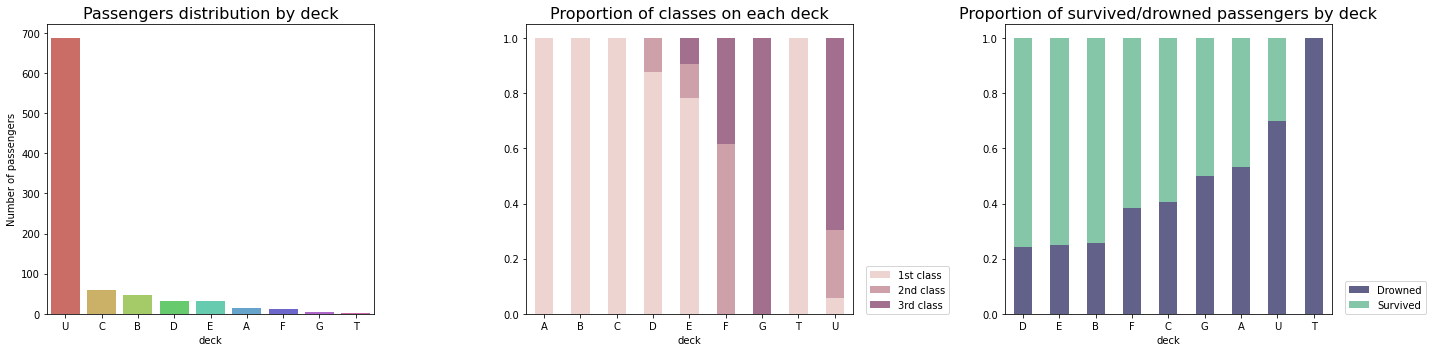

In [ ]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
sns.countplot(x = 'deck', data = all_data, palette = "hls", order = all_data['deck'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(132)
deck_by_class = all_data.groupby('deck')['Pclass'].value_counts(normalize = True).unstack()
deck_by_class.plot(kind='bar', stacked='True',color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of classes on each deck',fontsize= 16)
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
deck_by_survived = all_data.groupby('deck')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()


Most passengers don't have cabin numbers ('U').  
The largest part of passengers with known cabin numbers were located on the  'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.  
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'.  
Deck A was the closest to the deck with lifeboats, but it is the last in surviving rate (except unknown and T deck). How did it happen?

In [ ]:
all_data[(all_data['deck']=='A') & (all_data['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr,Mr,A
174,175,0.0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,Mr,Mr,A
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,Mr,Mr,A
284,285,0.0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,Mr,Mr,A
475,476,0.0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,Mr,Mr,A
583,584,0.0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,Mr,Mr,A
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,Mr,Mr,A
867,868,0.0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Mr,Mr,A


I was curious, so I read a bit about some of these passengers:  
[John Hugo Ross](https://www.encyclopedia-titanica.org/titanic-victim/john-hugo-ross.html) When he boarded on 10 April 1912, he was so ill from dysentery he had to be carried to his cabin on a stretcher. When Ross was told the ship had struck an iceberg and that he should get dressed, Ross refused to believe the trouble serious. "Is that all,?" he told Peuchen. "It will take more than an iceberg to get me off this ship." Presumably, Ross drowned in his bed.  

[Andrews, Mr. Thomas Jr](https://en.wikipedia.org/wiki/Thomas_Andrews) was a managing director of H&W (built the Titanic) in charge of designing and was familiar with every detail of the construction of the firm's ships. He helped to evacuate people.

[Roebling, Mr. Washington Augustus II ](https://www.encyclopedia-titanica.org/titanic-victim/washington-roebling.html) helped to evacuate people as well.

It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergensy were involved in the rescue process.

For training process it will be better to include passenger from T deck to the A deck group.

## 6.6 Class
We have made a lot of assumptions about the survival rate depending on the classes. Let's now look closely at this variable.

### 6.6.1 Passengers by class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


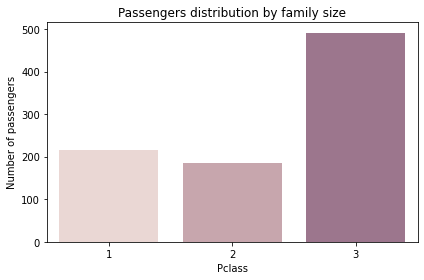

In [ ]:
ax = sns.countplot(all_data['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])
# calculate passengers for each category
labels = (all_data['Pclass'].value_counts(sort = False))
  
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')
plt.tight_layout()

Most of the Titanic's passengers were traveling third class (709).  
The second class is the smallest in terms of the number of passengers.

### 6.6.2 Class vs surviving status

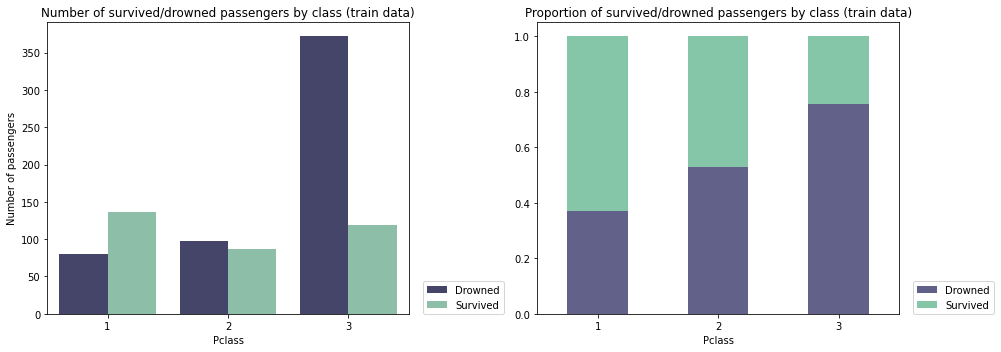

In [ ]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = all_data.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first class has the largest number of survivors and the proportion of survivors within the class is the largest.  
Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.

### 6.6.3 Class vs surviving status vs gender

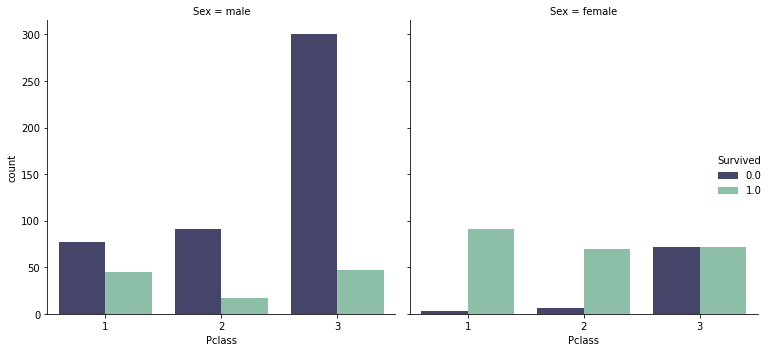

In [ ]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = all_data , palette=["#3f3e6fd1", "#85c6a9"])

plt.tight_layout()

However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the female survived.

In [ ]:
all_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
all_data.loc[(all_data['Sex']=='female') & (all_data['Survived']==0),'Age'].describe()

count    64.000000
mean     25.046875
std      13.618591
min       2.000000
25%      16.750000
50%      24.500000
75%      33.250000
max      57.000000
Name: Age, dtype: float64

### 6.6.4 Class vs. Gender vs. Age -> Surviving status 
For better understanding how the combination of some factors influence on chances to survive, lets break passengers into 18 imaginary groups separated by:
* **Class** (1 / 2 / 3)
* **Gender** (male / female)
* **Age** ( <16 / 16-40 / 40<)  

To do so I will create 6 stripplots (3 for male, 3 for female), with values grouped by Surviving status and add background color to separate age groups:

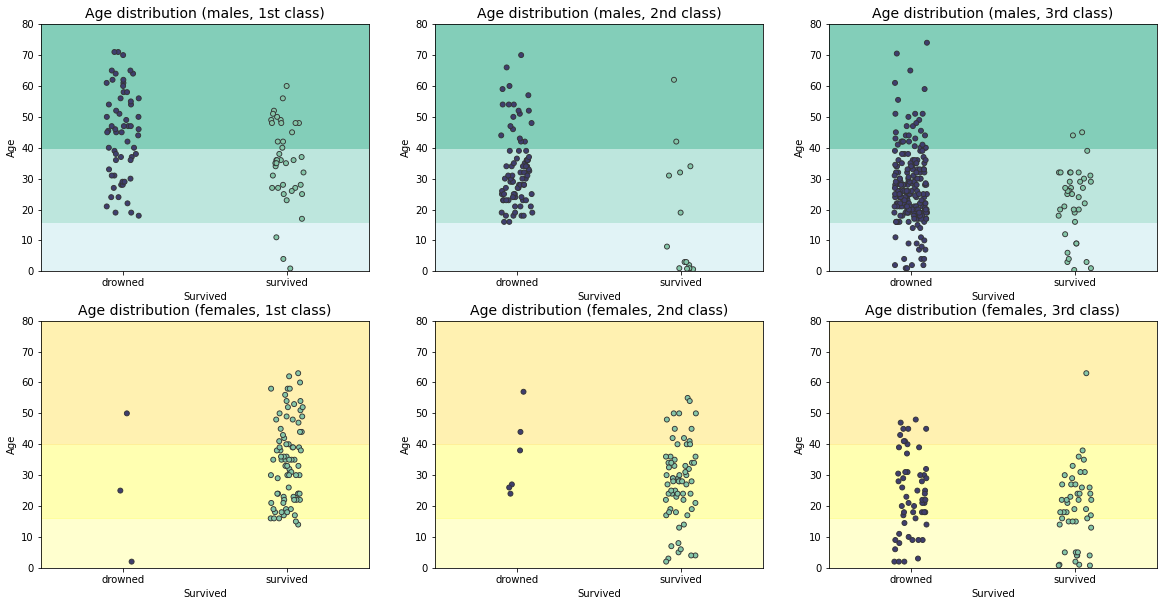

In [ ]:
plt.figure(figsize=(20, 10))
palette=["#3f3e6fd1", "#85c6a9"]

plt.subplot(2, 3, 1)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 3)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='male'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='female'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.show()

From these graphs (training data only) we can see, that 
* only one kid (<16) from 1st and 2nd classes are drowned (female from the 1st class).
* but children from the 3rd class were not so lucky, looks like chances to survive for passengers <16 were 50/50 for male and female.
* most females from 1st and 2nd class are survived, without much difference in Age.
* females from 3rd class in Age group 40+ drowned except one.
* similar picture for males in 2nd and 3rd classes in the Age group 40+: only 2 from each class are survived.
* for 40+ males from 1st class situation were slightly different, there are more survived passengers.
* the largest "accumulation" of drowned passengers is observed in the Age group 16-40 males, 3rd class.

## 6.7 Gender
Let's discover gender a little bit more:

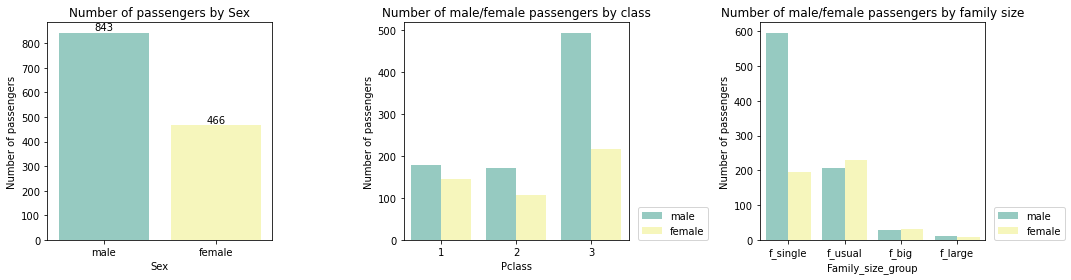

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot (1,3,1)
ax = sns.countplot(all_data['Sex'], palette="Set3")
plt.title('Number of passengers by Sex')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Sex'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.subplot (1,3,2)
sns.countplot( x = 'Pclass', data = all_data, hue = 'Sex', palette="Set3")
plt.title('Number of male/female passengers by class')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0))

plt.subplot (1,3,3)
sns.countplot( x = 'Family_size_group', data = all_data, hue = 'Sex', 
              order = all_data['Family_size_group'].value_counts().index , palette="Set3")
plt.title('Number of male/female passengers by family size')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0))
plt.tight_layout()

There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.  
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.

## 6.8 Embarked
Titanic had 3 embarkation points before the ship started its route to New York:
* Southampton
* Cherbourg
* Queenstown  

Some passengers could leave Titanic in Cherbourg or Queenstown and avoid catastrophe. Also, the point of embarkation could have an influence on ticket fare and location on the ship.  

![09269a9f7d50a3f019182a11f7aa7981.jpg](attachment:09269a9f7d50a3f019182a11f7aa7981.jpg)

Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


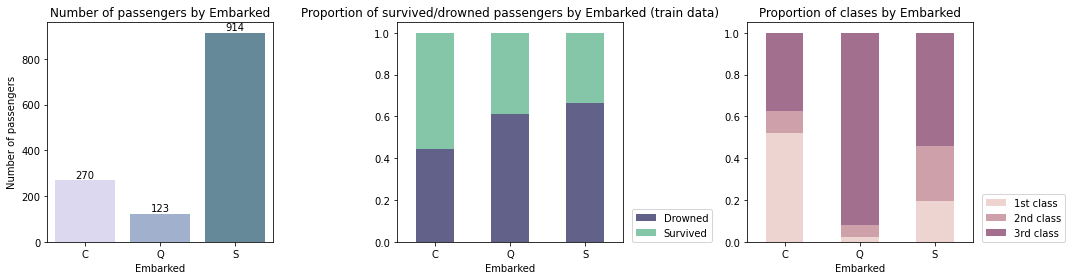

In [ ]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(all_data['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Embarked'].value_counts())
labels = labels.sort_index()
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

ax2 = fig.add_subplot(132)
surv_by_emb = all_data.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = all_data.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout()

* Most number of passengers (914) were embarked in Southampton. Also Southampton has the biggiest proportion of drowned passengers.
* 270 passengers emarked in Cherbourg and more than 50% of them survived (in the training dataset). 
* 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers


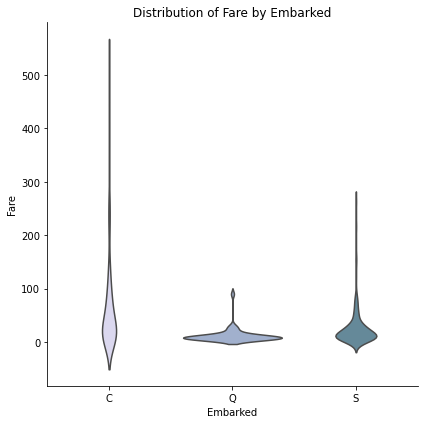

In [ ]:

sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=all_data, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [ ]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Embarked')['Fare'].describe())

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,270.0,62.336267,84.185996,4.0125,13.8583,28.51875,78.966675,512.3292
Q,123.0,12.409012,13.616133,6.7500,7.7500,7.75000,10.197900,90.0000
S,913.0,27.418824,37.096402,0.0000,8.0500,13.00000,27.750000,263.0000


* The wider fare distribution among passengers who embarked in Cherbourg. It makes scence - many first-class passengers boarded the ship here, but the share of third-class passengers is quite significant.
* The smallest variation in the price of passengers who boarded in q. Also, the average price of these passengers is the smallest, I think this is due to the fact that the path was supposed to be the shortest + almost all third-class passengers.

Let's check NA values of Embarked variable:

In [ ]:
train_data[train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


These two passengers traveled together (same ticket number). To impute missing values, we can use mode value for passengers with the closest fare value and Pclass.

## 6.9 Fare


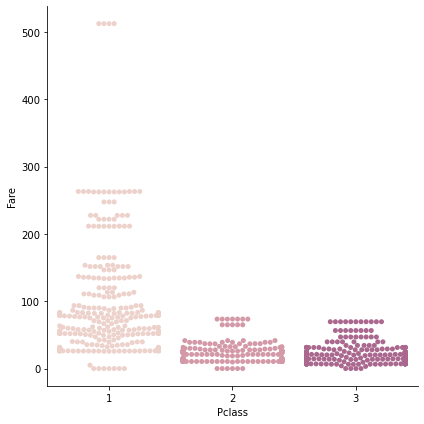

In [ ]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=all_data, palette=sns.cubehelix_palette(5, start = 3), height = 6)

plt.tight_layout()

We can observe that the distribution of prices for the second and third class is very similar. The distribution of first-class prices is very different, has a larger spread, and on average prices are higher. 

Let's add colours to our points to indicate surviving status of passenger (there will be only data from training part of the dataset):

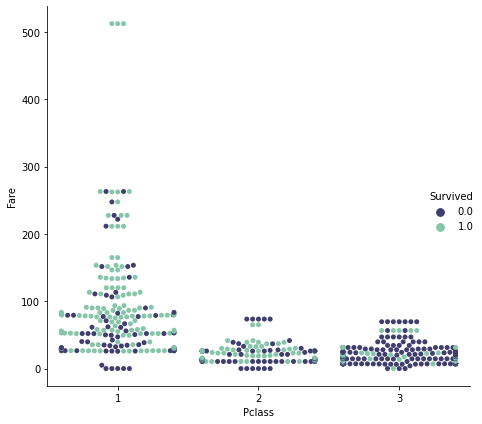

In [ ]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=all_data, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.tight_layout()

Looks like the bigger passenger paid, the more chances to survive he had.  
What about zero fare in the first class? Is it a mistake?

In [ ]:
all_data[all_data['Fare'] == min(all_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname,Family_size_group
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Leonard,f_single
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,Mr,B,1,Harrison,f_single
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Tornquist,f_single
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Parkes,f_single
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Johnson,f_single
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Cunningham,f_single
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Campbell,f_single
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,Mr,U,1,Frost,f_single
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Johnson,f_single
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,Mr,U,1,Parr,f_single


Some of the passengers have "Line" tickets, perhaps they were somehow involved in the Titanic, but were not the ship's crew. I don't think we should change these prices, but add an additional feature for these passengers.

# 7. Conclusion
We know that there were not enough boats on Board the Titanic for all passengers to be able to evacuate. After studying the information about the passengers, we can make some assumptions about who had a better chance of survival in a shipwreck situation as well as General observations about passengers.

* There are 891 passengers in the train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived. But we know, that lifeboats (16 wooden lifeboats and four collapsible) could carry 53% of total passengers.
* The Age of all passengers vary from about 0.17 year to 80 years with average 29.88. The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for). It looks like there is a slightly bigger chance to survive for younger people.
* Exploring the title of passengers, we can see that the biggest proportion of survivors is in the "Mrs" group - a married woman. More than 80% drowned in the "Mr." group and nobody survived among the Reverend group.
* Most passengers don't have cabin numbers. The largest part of passengers with known cabin numbers was located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.  
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'. Deck A was the closest to the deck with lifeboats, but it is the last in the surviving rate.
* The family size on board also seems to have an influence on chances for survival: there were two large families with sizes 8 and 11 and all their members from the training dataset are drowned.  We can observe that the percentage of survivors in people who have a family of 2, 3, 4 people is greater than in singles, then the percentage of survivors decreases as the family size increases.  
* Most of the Titanic's passengers were traveling third class (709). The second class is the smallest in terms of the number of passengers. Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first-class has the largest number of survivors and the proportion of survivors within the class is the largest.  
Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.
* However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the females survived.  
There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.  
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.  
* Most numbers of passengers (914) were embarked in Southampton. Also, Southampton has the biggest proportion of drowned passengers. 270 passengers embarked in Cherbourg and more than 50% of them survived (in the training dataset). 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers.  

 
If we use a naive approach and consider all the parameters separately, then young female first-class passengers with the title Mrs have a moderate number of relatives on Board, who paid a large amount for a ticket and went on Board in  Cherbourg have a better chance of survival. 
For sure, there is a relationship between variables, and survival was influenced not only by the title, or ticket, or age itself but by a combination of factors that are to some extent interrelated.   
And It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergency were involved in the rescue process.

[**Second part of my work**](https://www.kaggle.com/demidova/titanic-feature-engineering-and-solution-tutorial) with Titanic dataset and contains:

* Missing data imputation
* Feature generation
* Models implementation and tuning: Logistic Regression, Random Forest, XGBoost
* Comparing models and submission
